# Using Deep Learning to Quantify Fibrosis in Muscle Tissue
## Visualization
## By Sergei Issaev



# Edit Here

In [1]:
test_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/data/traintest/diaphragmsmarinefascia4/test_liver2.npz'
#model_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/models/test0001/model_237000.h5'
model_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/models/model_283000.h5'
training_data_directory = '/home/sergei/projects/def-rogertam/sergei/micro_scans/data/traintest/diaphragmsmarinefascia4/train_liver2.npz'
inv_data_gen_args = dict()
# , samplewise_center=True

# End of Edit Here

### Import libraries

In [2]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import cv2  
import numpy as np  
RANDOM_STATE = 42
print('Environment Ready')

Environment Ready


### Load Training Data

In [3]:
print('load and prepare training images')
def load_real_samples(filename):
    # load compressed ararys
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5

    return [X1, X2]

load and prepare training images


In [4]:

invariant_datagen = ImageDataGenerator(**inv_data_gen_args)

dataset = load_real_samples(training_data_directory)
print('Loaded', dataset[0].shape, dataset[1].shape)
trainA, trainB = dataset
invariant_datagen.fit(trainA, augment=True)


Loaded (3132, 256, 256, 3) (3132, 256, 256, 3)


In [5]:
print('plot source, generated and target images')
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + abs(images.min())) / 2.0
    #print(images[0].min(), images[0].max(), images[1].min(), images[1].max(), images[2].min(), images[2].max())
    for k in range(len(images)):
        images[k] = (cv2.cvtColor(images[k], cv2.COLOR_BGR2RGB))
    # plot images row by row
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 10))
    fig.suptitle('Visual comparison of generated and ground truth images')
    ax[0].set_title('Source Image')
    ax[0].imshow(images[0], cmap='gray')
    ax[0].axis('off')
    ax[1].set_title('Generated Output')
    ax[1].imshow(images[1], cmap='gray')
    ax[1].axis('off')
    ax[2].set_title('Expected Output')
    ax[2].imshow(images[2], cmap='gray')
    ax[2].axis('off')
    plt.show()

plot source, generated and target images


In [6]:
# load dataset
[X1, X2] = load_real_samples(test_file)
print('Loaded', X1.shape, X2.shape)

Loaded (349, 256, 256, 3) (349, 256, 256, 3)


### Load Model

In [7]:
# load model
model = load_model(model_file, compile=False)

In [8]:
ix = randint(0, len(X1), 1)

src_image, tar_image = X1[ix], X2[ix]




invariant_generator = invariant_datagen.flow(
src_image)
invariant_generator.next()


invariant =  invariant_generator[0].copy()

src_image = invariant  
print(ix)

[167]


In [9]:
# generate image from source
gen_image = model.predict(src_image)
#gen_image = (gen_image + 1.0 )/ 2.0
print(gen_image.min(), gen_image.max())
gen_image.shape


-1.0 0.5107575


(1, 256, 256, 3)

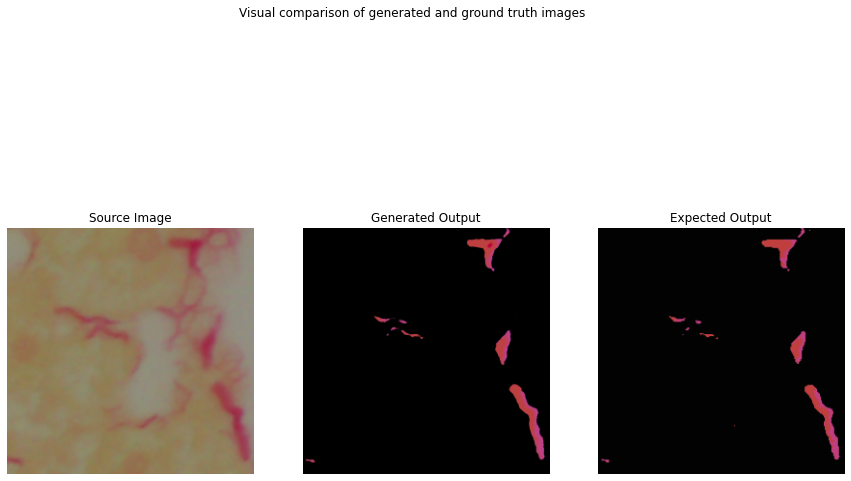

In [10]:
# plot all three images
plot_images(src_image, gen_image, tar_image)

[244]
[244]
src before (-0.654902, 0.21568628)
-1.0 0.5388317
-1.0 0.49803922
src after (0.0, 1.0)
0.0 1.0
0.0 1.0


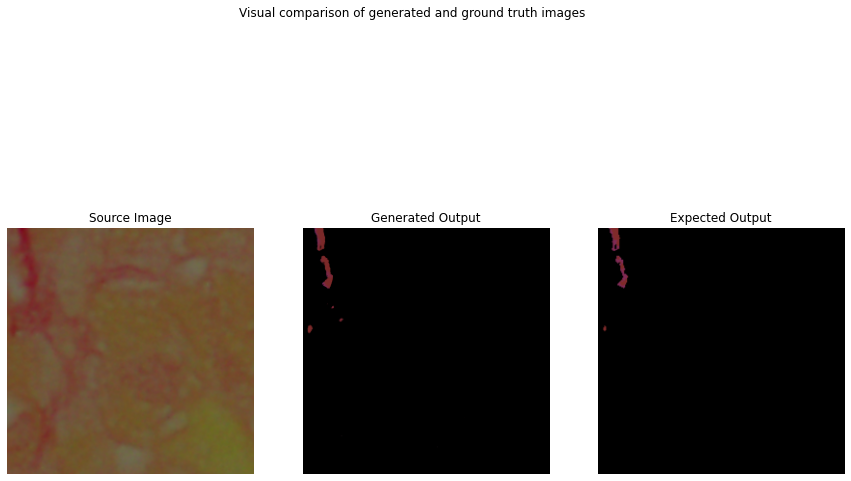

In [11]:
ix = randint(0, len(X1), 1)

src_image, tar_image = X1[ix], X2[ix]
print(ix)
invariant_generator = invariant_datagen.flow(
src_image)
invariant_generator.next()


invariant =  invariant_generator[0].copy()

src_image = invariant  
print(ix)

# generate image from source
gen_image = model.predict(src_image)
print(f"src before {src_image.min(), src_image.max()}")
print(gen_image.min(), gen_image.max())
print(tar_image.min(), tar_image.max())
#gen_image = (gen_image + abs(gen_image.min())) 
src_image = (src_image + abs(src_image.min())) 
src_image = src_image / src_image.max()
gen_image = (gen_image + abs(gen_image.min()))
gen_image = gen_image / gen_image.max()
tar_image = (tar_image + abs(tar_image.min())) 
tar_image = tar_image / tar_image.max()
print(f"src after {src_image.min(), src_image.max()}")
print(gen_image.min(), gen_image.max())
print(tar_image.min(), tar_image.max())
gen_image.shape

# plot all three images
plot_images(src_image, gen_image, tar_image)

ix is 124/349
src before (-1.0, 0.23921569)
-1.0 0.37548772
-1.0 1.0
src after (-1.0, 0.23921569)
0.0 1.0
0.0 1.0


/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


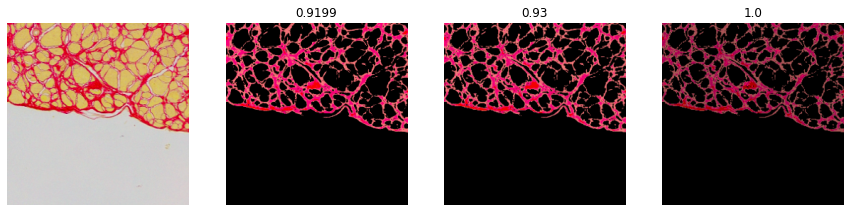

In [12]:
ix = randint(0, len(X1), 1)

src_image, tar_image = X1[ix], X2[ix]
print(f'ix is {ix[0]}/{len(X1)}')
invariant_generator = invariant_datagen.flow(
src_image)
invariant_generator.next()


invariant =  invariant_generator[0].copy()

src_image = invariant  




model_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/models/test0001/model_237000.h5'
# load model
model = load_model(model_file, compile=False)



# generate image from source
gen_image = model.predict(src_image)
print(f"src before {src_image.min(), src_image.max()}")
print(gen_image.min(), gen_image.max())
print(tar_image.min(), tar_image.max())
#gen_image = (gen_image + abs(gen_image.min())) 

gen_image = (gen_image + abs(gen_image.min()))
gen_image = gen_image / gen_image.max()
tar_image = (tar_image + abs(tar_image.min())) 
tar_image = tar_image / tar_image.max()
print(f"src after {src_image.min(), src_image.max()}")
print(gen_image.min(), gen_image.max())
print(tar_image.min(), tar_image.max())



model_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/models/test0231/model_239000.h5'
# load model
model = load_model(model_file, compile=False)



# generate image from source
gen_image2 = model.predict(src_image)
gen_image2 = (gen_image2 + abs(gen_image2.min()))
gen_image2 = gen_image2 / gen_image2.max()
gen_image2 = cv2.cvtColor(gen_image2.squeeze(), cv2.COLOR_BGR2RGB)


src_image = (src_image + abs(src_image.min())) 
src_image = src_image / src_image.max()

src_image = cv2.cvtColor(src_image.squeeze(), cv2.COLOR_BGR2RGB)
gen_image = cv2.cvtColor(gen_image.squeeze(), cv2.COLOR_BGR2RGB)
tar_image = cv2.cvtColor(tar_image.squeeze(), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 10))

from skimage import measure
s = measure.compare_ssim(np.array(gen_image), np.array(tar_image), multichannel=True)
s2 = measure.compare_ssim(np.array(gen_image2), np.array(tar_image), multichannel=True)

ax[0].imshow(src_image, cmap='gray')
ax[0].axis('off')

ax[1].set_title(round(s, 4))
ax[1].imshow(gen_image, cmap='gray')
ax[1].axis('off')
ax[2].set_title(round(s2, 4))
ax[2].imshow(gen_image2, cmap='gray')
ax[2].axis('off')

ax[3].set_title(1.0000)
ax[3].imshow(tar_image, cmap='gray')
ax[3].axis('off')
plt.show()

In [13]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [14]:
gen = np.array(gen_image2)
tar = 

SyntaxError: invalid syntax (<ipython-input-14-b98ab9a7b7ec>, line 2)

In [ ]:
ms = mse(gen, tar)

In [ ]:
s